In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [4]:
# loading the data
tweet = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tweet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [5]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0], tweet.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0], test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


0    4342
1    3271
Name: target, dtype: int64


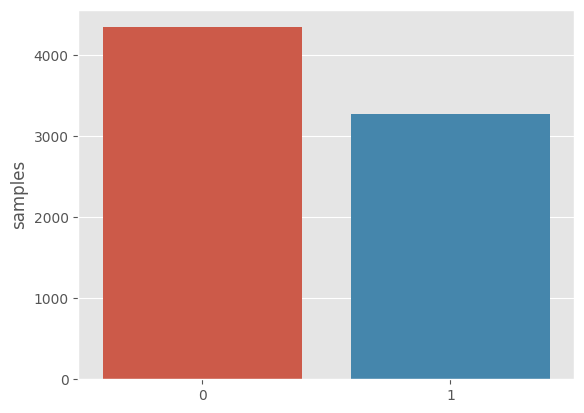

In [14]:
# class distribution
# 0: no disaster, 1: disaster
x=tweet.target.value_counts()
print(x)
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')
plt.show()

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64
15       14
16       13
17       16
18       17
19       28
       ... 
7581    104
7582     80
7584    127
7587     18
7593     60
Name: text, Length: 4342, dtype: int64


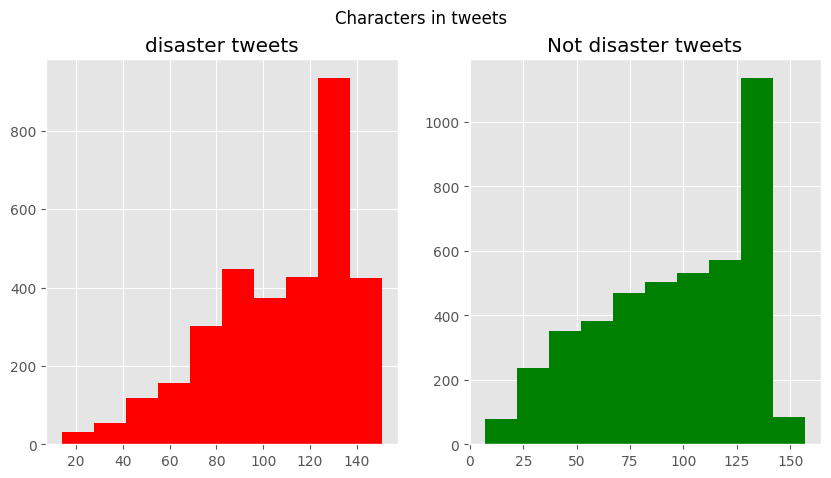

In [21]:
# number of characters in a tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target']==1]['text'].str.len()
print(tweet_len)
# histogram
ax1.hist(tweet_len, color='red')
ax1.set_title('disaster tweets')

tweet_len = tweet[tweet['target']==0]['text'].str.len()
print(tweet_len)
ax2.hist(tweet_len, color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

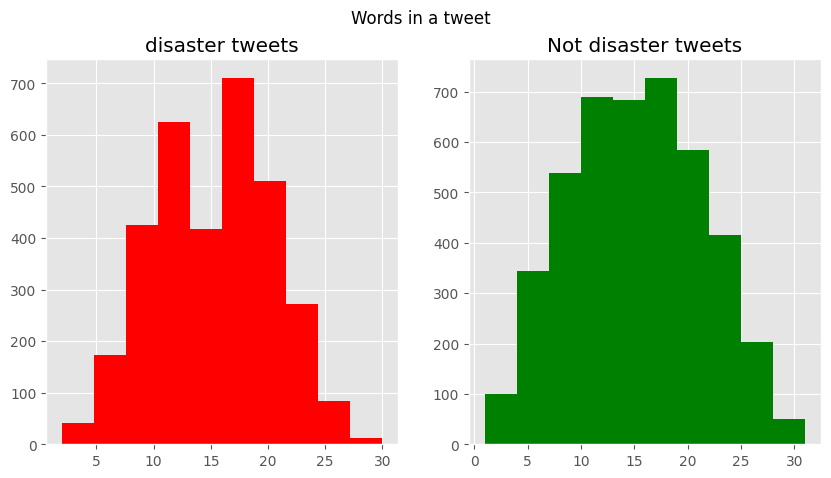

In [24]:
# number of words in a tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

0                [3, 5, 3, 3, 6, 2, 4, 11, 3, 5, 7, 2, 3]
1                                   [6, 4, 4, 2, 5, 5, 6]
2       [3, 9, 5, 2, 8, 2, 6, 3, 5, 8, 2, 9, 2, 5, 10,...
3                             [6, 6, 7, 10, 10, 6, 2, 10]
4       [4, 3, 4, 4, 5, 4, 4, 7, 2, 5, 4, 10, 5, 4, 1, 6]
                              ...                        
7608                   [3, 5, 6, 7, 1, 6, 8, 4, 6, 5, 22]
7609    [12, 12, 3, 3, 2, 7, 4, 5, 2, 10, 4, 2, 3, 8, ...
7610                            [5, 6, 8, 1, 2, 7, 7, 22]
7611    [6, 13, 5, 2, 6, 8, 4, 1, 3, 2, 6, 9, 6, 5, 8,...
7612            [3, 7, 4, 5, 5, 2, 8, 10, 8, 1, 3, 4, 22]
Name: text, Length: 3271, dtype: object


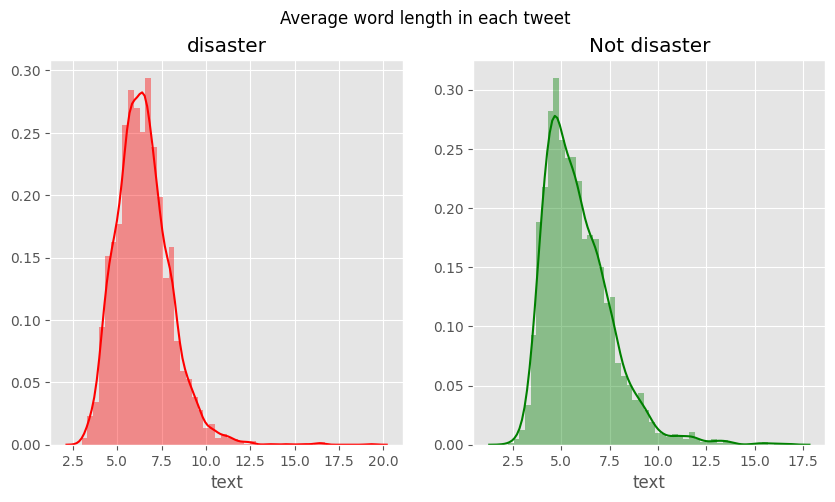

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
print(word)
# seaborn(sns): data visualization tool
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')

word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')
plt.show()